In [1]:
#Import library
from qiskit import*
from collections import deque
from qiskit import Aer
from qiskit.visualization import plot_histogram
from random import randint
import numpy as np
from numpy import pi

# Task 4: Predict function

In [2]:
#identity function
def identity_func(qc,output):
    qc.id(output)

In [3]:
#NAND function for C
def nand_func_c(qc,output):
    qc.x(output)

In [4]:
#NAND function for A
def nand_func_a(qc,output):
    qc.x(output)
    qc.z(output)

In [5]:
#Copy function
def copy_func(qc,a,c):
    qc.cx(a,c)

In [6]:
def random_func_implement(qc,n):
    for i in range (n):
        t = randint(0,3)
        #t=1
        if (t == 0):
            identity_func(qc,n)
        elif (t == 1):
            nand_func_a(qc,i)
        elif (t == 2):
            nand_func_c(qc,n)
        else:
            copy_func(qc,i,n)

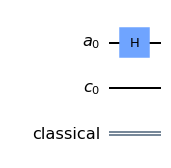

In [7]:
q_input = QuantumRegister(1, name = "a")
q_output = QuantumRegister(1, name = "c")
classical = ClassicalRegister(1, name = "classical")
qc = QuantumCircuit(q_input, q_output, classical)
qc.h(q_input)
qc.draw('mpl')

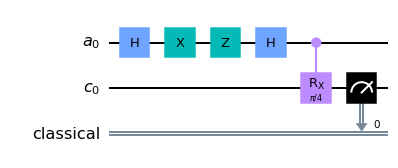

In [8]:
random_func_implement(qc,1)
qc.h(q_input)
qc.crx(np.pi/4,0,1)
qc.measure(q_output,classical)
qc.draw('mpl')

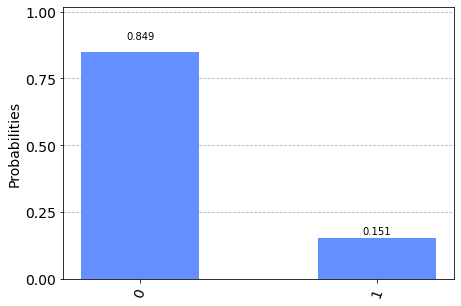

In [9]:
backend = Aer.get_backend('qasm_simulator')
sim = execute(qc, backend)
result = sim.result()
counts = result.get_counts()
plot_histogram(counts)
#Measuring only output qubit
#It is easy to check if the function is NAND function for C (state |1> ) or copy function (state 1/sqrt(2)|0> + 1/sqrt(2)|1>)
#In order to check NAND function for A and identity function which will produce state |0> by defaults.
#Therefore, we use a trick as in the NAND function for A, we include a Z gate which will help the A quibt become |1> 
#which will active controlled-Rx(pi/4). 
#Then we can easily predict the function:100% |0> (identity function),100% |1> (NAND function for C),50% |0> + 50% |1> (copy function) and 85% |0> + 15% |1> (NAND function for A) 